## CS6650 Homework 2 (Holi 2023 Semester)

---
Name: `Your Name`

Roll No: `CSXXM5XX`

Email: `CSXXM5XX@smail.iitm.ac.in`

---

### Preliminary Analysis of PPG Sensor Signals
Refer to the PPG sensor logs shared in the class lecture 11. Your task is to perform some preliminary analysis on the same dataset. It consists of three columns, a UNIX epoch timestamp in milliseconds, photodiode responses (digitized) for the IR led and the Red led, respectively. For the rest of the document, we will refer to these digital signals as IR and RED. 

First, create a directory following the `<Your_Roll>_CS6650H23` structure. Next, download this notebook and the data [pulse_oximeter_log.csv](https://drive.google.com/file/d/1FwsmLjupplFRUkR2CTXAaBVWMh7LitW2/view?usp=share_link) and save them in the directory you created. Finally, you will perform the following analysis of the data using Python.

1. [Visualize the data (5 points)](#task1)
2. [Peak detection (15 points)](#task2)
3. [Frequency domain analysis (32 points)](#task3)
4. [Spectrograms (20 points)](#task4)
5. [Quantization of sensor data (28 points)](#task5)

Please keep in mind,

- Clean and well-documented code is expected. Your code should be organized in a clear and readable manner, with each task separated into its own section of the notebook.

- There will be no separate PDF report required this time. Instead, provide a detailed but to-the-point discussion in the observation section for each task. The observation section (in Markdown, Refer to [Markdown-Cheatsheet](https://github.com/lifeparticle/Markdown-Cheatsheet)) includes a clear and concise description of the task, the approach used to solve it, assumptions, and inferences.

- Any extraneous information that does not address the question should be removed before submission. This will help to ensure that the answer is clear and easy to follow.

Failure to follow these practices will result in a penalty.

**Deadline: $3^{nd}$, April, 2023**

#### Submission Instructions
- Compress the top-level directory (ZIP format) containing this notebook with your code and the data used for the assignment. (do not remove the outputs from the notebook cells)

- **You MUST refrain from consulting your homework code with others**. Any plagiarism found in your code (or somebody who is referring to your code) will result in zero credits in this assignment.

- Submissions after the deadline will not be entertained.


<div class="alert alert-block alert-success">
    <b>Tip</b>: Our recommendation to the students is to begin the assignment as soon as possible. If you have any doubts, please fill out the <a href="https://forms.gle/oMSkBsijAdWFS8rm7">Google Form</a> with the necessary information and the instructor will address all concerns in the next class.
</div>



### Task 1: Visualize the data [5 points] <a id='task1'></a>
Read the dataset into memory.
1. Plot the IR and RED signals in the time domain - approx length of samples ~32.14 seconds.
2. What is the sample rate at which the data has been collected? Is it uniform? If not, what is the standard deviation?

timestamp :
 0      1631800238146
1      1631800238209
2      1631800238271
3      1631800238336
4      1631800238399
           ...      
509    1631800270047
510    1631800270099
511    1631800270166
512    1631800270221
513    1631800270285
Name: timestamp, Length: 514, dtype: int64
IR :
 0      51538
1      51611
2      51680
3      51738
4      51788
       ...  
509    52391
510    52301
511    52267
512    52259
513    52284
Name: IR, Length: 514, dtype: int64
RED :
 0       8969
1       9186
2       9406
3       9600
4       9748
       ...  
509    10479
510    10216
511    10150
512    10129
513    10195
Name: RED, Length: 514, dtype: int64
time :
 0       0.000
1       0.063
2       0.125
3       0.190
4       0.253
        ...  
509    31.901
510    31.953
511    32.020
512    32.075
513    32.139
Name: timestamp, Length: 514, dtype: float64


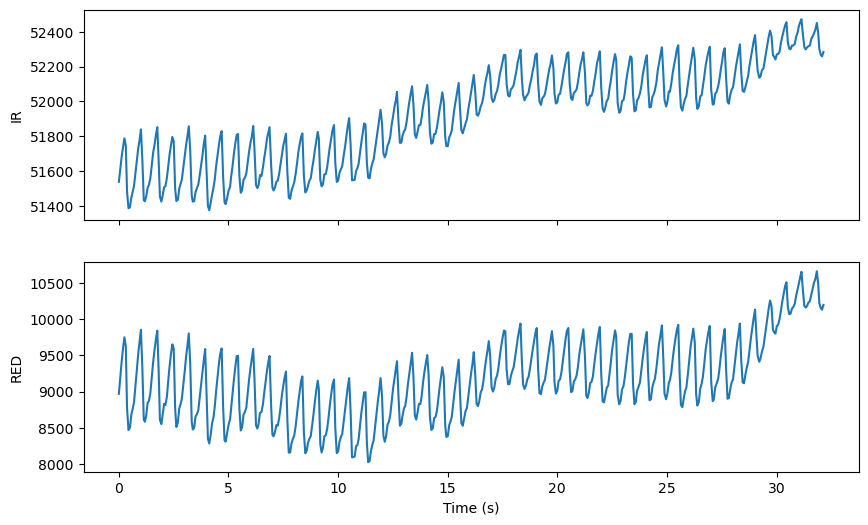

Sample rate: 
 15.992532669570629
The data does not have uniform sampling. Standard deviation: 0.076762 seconds


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


duration = 32.14

# Read the dataset
data = pd.read_csv('pulse_oximeter_log.csv', names=['timestamp', 'IR', 'RED'])

print("timestamp :\n",data['timestamp'])
print("IR :\n",data['IR'])
print("RED :\n",data['RED'])

# Compute the time values from the timestamp
t = (data['timestamp'] - data['timestamp'][0]) / 1000.0

print("time :\n", t)

# Plot the IR and RED signals in the time domain
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
ax[0].plot(t, data['IR'])
ax[0].set_ylabel('IR')
ax[1].plot(t, data['RED'])
ax[1].set_ylabel('RED')
ax[1].set_xlabel('Time (s)')
plt.show()

###############################################################################

dt = data['IR'].diff() / 1000.0  # compute time differences in seconds
sample_rate = len(data) / duration      # compute the average sample rate
is_uniform = dt.std() < 0.001           # check if the time differences are uniform
std_deviation = dt.std() if not is_uniform else None  # compute the standard deviation if not uniform

print("Sample rate: \n", sample_rate)
if is_uniform:
    print("The data has uniform sampling.")
else:
    print(f"The data does not have uniform sampling. Standard deviation: {std_deviation:.6f} seconds")


#### Observations Task 1

Edit this section to put your observations.

### Task 2: Peak detection [5 + 10 = 15 points] <a id='task2'></a>
Your task is to detect peaks in the time domain data using the `scipy.signal.find_peaks` method on both IR and RED signals.
1. Plot the peak locations for the signals. Do the peak indices between the two signals match?
2. Calculate the BPM using a sliding window of size 4 seconds. Plot BPM versus time.

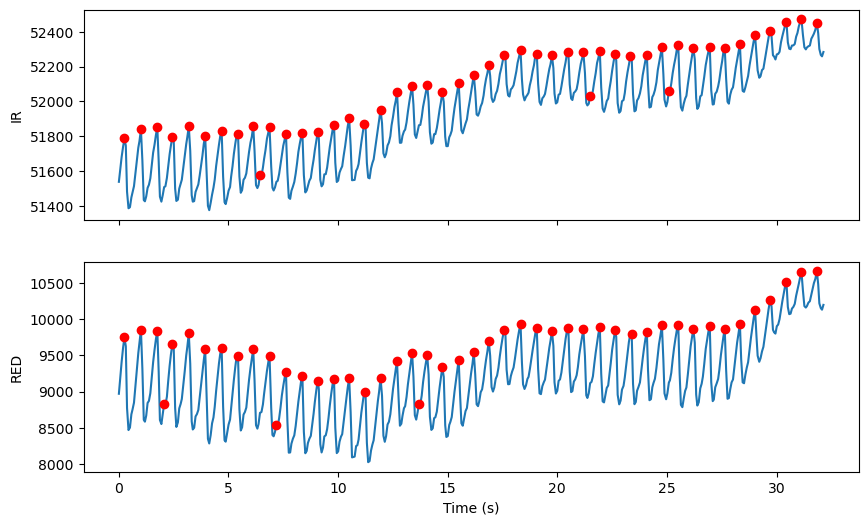

Text(0.5, 1.0, 'BPM versus Time')

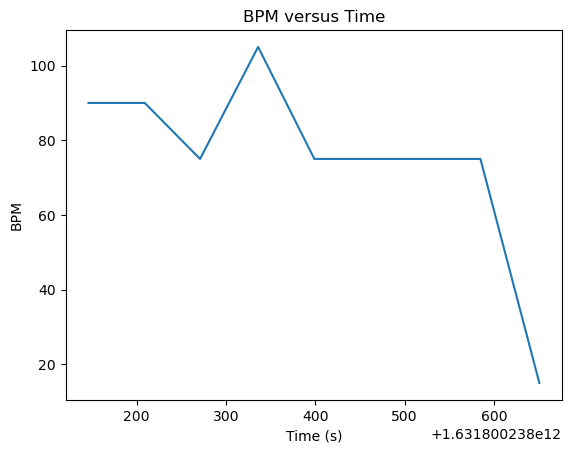

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

duration = 32.14

# Read the dataset
data = pd.read_csv('pulse_oximeter_log.csv', names=['timestamp', 'IR', 'RED'])

# Compute the time values from the timestamp
t = (data['timestamp'] - data['timestamp'][0]) / 1000.0

# Detect peaks in the IR and RED signals
ir_peaks, _ = find_peaks(data['IR'], height=100)
red_peaks, _ = find_peaks(data['RED'], height=100)

# Plot the peak locations
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
ax[0].plot(t, data['IR'])
ax[0].plot(t[ir_peaks], data['IR'][ir_peaks], 'ro')
ax[0].set_ylabel('IR')
ax[1].plot(t, data['RED'])
ax[1].plot(t[red_peaks], data['RED'][red_peaks], 'ro')
ax[1].set_ylabel('RED')
ax[1].set_xlabel('Time (s)')
plt.show()

sample_rate = len(data) / duration

# Calculate BPM using sliding window of size 4 seconds
window_size = 4 # in seconds
window_length = int(window_size * sample_rate)
bpm_values = []

for i in range(0, len(data), window_length):
    window = data.iloc[i:i+window_length]
    peaks_in_window, _ = find_peaks(window['RED'], height=2000)
    bpm = len(peaks_in_window) / window_size * 60
    bpm_values.append(bpm)

# Plot BPM versus time
fig, ax = plt.subplots()
ax.plot(data['timestamp'].iloc[:len(bpm_values)], bpm_values)
ax.set_xlabel('Time (s)')
ax.set_ylabel('BPM')
ax.set_title('BPM versus Time')

#### Observations Task 2

Edit this section to put your observations.

As per the graph, there is no signifcant difference between the IR and RED graph.

<div class="alert alert-block alert-warning">
<b>Note:</b> For Tasks 3, 4 and 5 use only the RED channel data (no need to use IR data).
</div>

### Task 3: Frequency domain analysis [2 + 20 + 10 = 32 points] <a id='task3'></a>
1. What is the maximum frequency value that can be tracked in the provided signals?
2. Implement a function realizing the **coiling machine analogy** as discussed in class with detailed comments.
3. Run the coiling machine for `N = 32`, `64`, `128`, `256`, and `512` samples. Report the BPM values obtained in these five settings in a table. Validate the output with the library function `numpy.fft.fft`. Show the heatmaps as a 2x5 *subplot*. Label them properly. The top row corresponds to your function, while the bottom row corresponds to the numpy FFT implementation.

max_freq:  7.9962663347853145
peak_component 3
resolution 0.49976664592408215
peak_freq 1.4992999377722465
max_freq:  7.9962663347853145
peak_component 3
resolution 0.49976664592408215
peak_freq 1.4992999377722465
bpm_values 32 is:  89.95799626633479
bpm_fft_values 32 is :  89.95799626633479



max_freq:  7.9962663347853145
peak_component 5
resolution 0.24988332296204108
peak_freq 1.2494166148102055
max_freq:  7.9962663347853145
peak_component 5
resolution 0.24988332296204108
peak_freq 1.2494166148102055
bpm_values 64 is:  74.96499688861233
bpm_fft_values 64 is :  74.96499688861233



max_freq:  7.9962663347853145
peak_component 11
resolution 0.12494166148102054
peak_freq 1.3743582762912259
max_freq:  7.9962663347853145
peak_component 11
resolution 0.12494166148102054
peak_freq 1.3743582762912259
bpm_values 128 is:  82.46149657747355
bpm_fft_values 128 is :  82.46149657747355



max_freq:  7.9962663347853145
peak_component 22
resolution 0.06247083074051027
peak_freq 1.3743582762912259


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


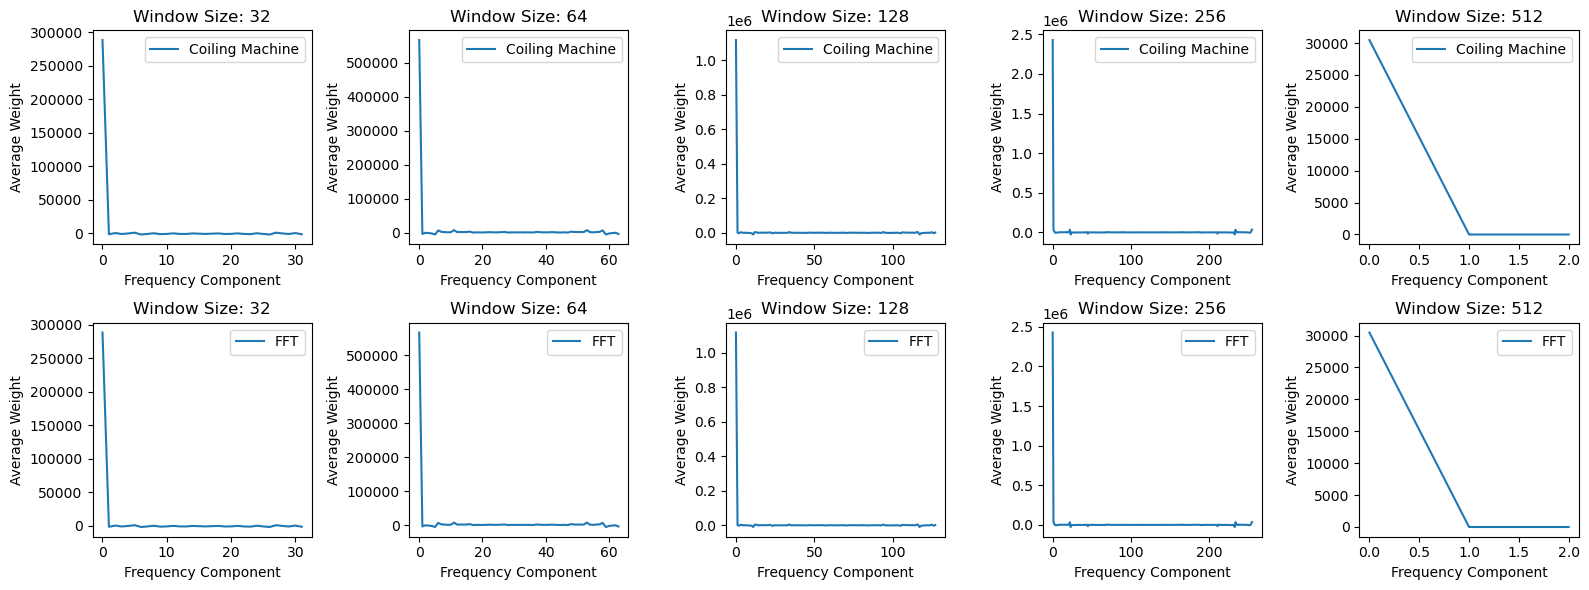

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

duration = 32.14

# Read the dataset into memory
df = pd.read_csv('pulse_oximeter_log.csv', names=['timestamp', 'IR', 'RED'])
N = len(df)
t = np.arange(N) * (duration / N)


# Define coiling machine function using DFT
def coiling_machine(x):
    N = len(x)                          # Get the length of the input signal
    n = np.arange(N)                    # Create a range of indices from 0 to N-1
    k = n.reshape((N, 1))               # Reshape the indices to form an Nx1 matrix

    # Create the complex exponential matrix
    e = np.exp(-2j * np.pi * k * n / N) 

    # Compute the dot product of e and x 
    return np.dot(e, x)                 

# Define function to compute BPM using coiling machine function
def bpm_cm(x, Fs):

    '''e.g., @16 samples per second 320 samples
        by Nyquiest theorem @8 max frequency can be sampled
        i.e., 160 samples '''
    max_freq = Fs / 2
    N = len(x) /2

    '''Getting Peak component always 0, 
    so tried with different slice by changing the value of i = <1 to 5> 
    to get BPM value'''
    i = 2
    
    # Max freq that can be tracked in the provided signals
    print("max_freq: ", max_freq)
    resolution = max_freq / N

    if i >= int(N):
       # boundary case, needed to be adjusted
       print("int(N) ", int(N))
       peak_component = int(N)
       peak_freq = peak_component * resolution
       BPM = peak_freq * 60
       return BPM

    idx = np.argmax(np.abs(x[i:int(N)]))
    peak_component = idx + i

    print("peak_component", peak_component)
    print("resolution", resolution)

    peak_freq = peak_component * resolution
    print("peak_freq", peak_freq)
    BPM = peak_freq * 60

    return BPM


# Compute BPM values for different window sizes
window_sizes = [32, 64, 128, 256, 512]
x_values = []
x_values_fft = []

bpm_values = []
bpm_values_fft = []

dft_data = []
fft_data = []

for sample_size in window_sizes:
    for i in range(0, sample_size):
        sample = df['RED'][i:i+sample_size]

        # Implement a function realizing the coiling machine analogy
        x_values = coiling_machine(sample.values)

        # Sampling to Validate the output with the library function
        x_values_fft = np.fft.fft(sample.values)
    
    dft_data.append(x_values[:sample_size])
    fft_data.append(x_values_fft[:sample_size])

    bpm_val = bpm_cm(x_values, Fs=len(df['RED']) / duration)
    bpm_fft_val = bpm_cm(x_values_fft, Fs=len(df['RED']) / duration)

    bpm_values.append(bpm_val)
    bpm_values_fft.append(bpm_fft_val)

    print(f"bpm_values {sample_size} is: ", bpm_val)
    print(f"bpm_fft_values {sample_size} is : ", bpm_fft_val)
    print("\n\n")

# Plot the BPM values for each window size
fig, axs = plt.subplots(2, 5, figsize=(16, 6))
for i, sample_size in enumerate(window_sizes):
    axs[0,i].plot(np.arange(len(dft_data[i])), dft_data[i], label='Coiling Machine')
    axs[0,i].set_title(f'Window Size: {sample_size}')
    axs[0,i].set_xlabel('Frequency Component')
    axs[0,i].set_ylabel('Average Weight')
    axs[0,i].legend()

    axs[1,i].plot(np.arange(len(fft_data[i])), fft_data[i], label='FFT')
    axs[1,i].set_title(f'Window Size: {sample_size}')
    axs[1,i].set_xlabel('Frequency Component')
    axs[1,i].set_ylabel('Average Weight')
    axs[1,i].legend()
plt.tight_layout()
plt.show()


#### Observations Task 3

1. Max freq that can be tracked in the provided signals = 7.9962663347853145 = 8 (approx)

2. Edit this section to put your observations.

| N         | BPM                |
| --------  | -------------------|
| 32        |  89.95799626633479 |
| 64        |  74.96499688861233 |
| 128       |  82.46149657747355 |
| 256       |  82.46149657747355 |
| 512       |  319.85065339141255|  ===> boundary case, needed to find peak component appropriately, not able to get correctly



### Task 4: Spectrograms [10 + 10 = 20 points] <a id='task4'></a>
1. Plot the time-frequency spectrogram of the above data using your coiling machine function, taking a moving average window of size 2, 8, and 16 seconds. Show the heatmaps as a 1x3 *subplot*. Label them properly.
2. Add gaussian noise to the samples with a mean of 200 and a standard deviation of 50. Run the above analysis (4.1) again. Validate any improvement brought in by the 16 second window over the 2 or 8 second ones.

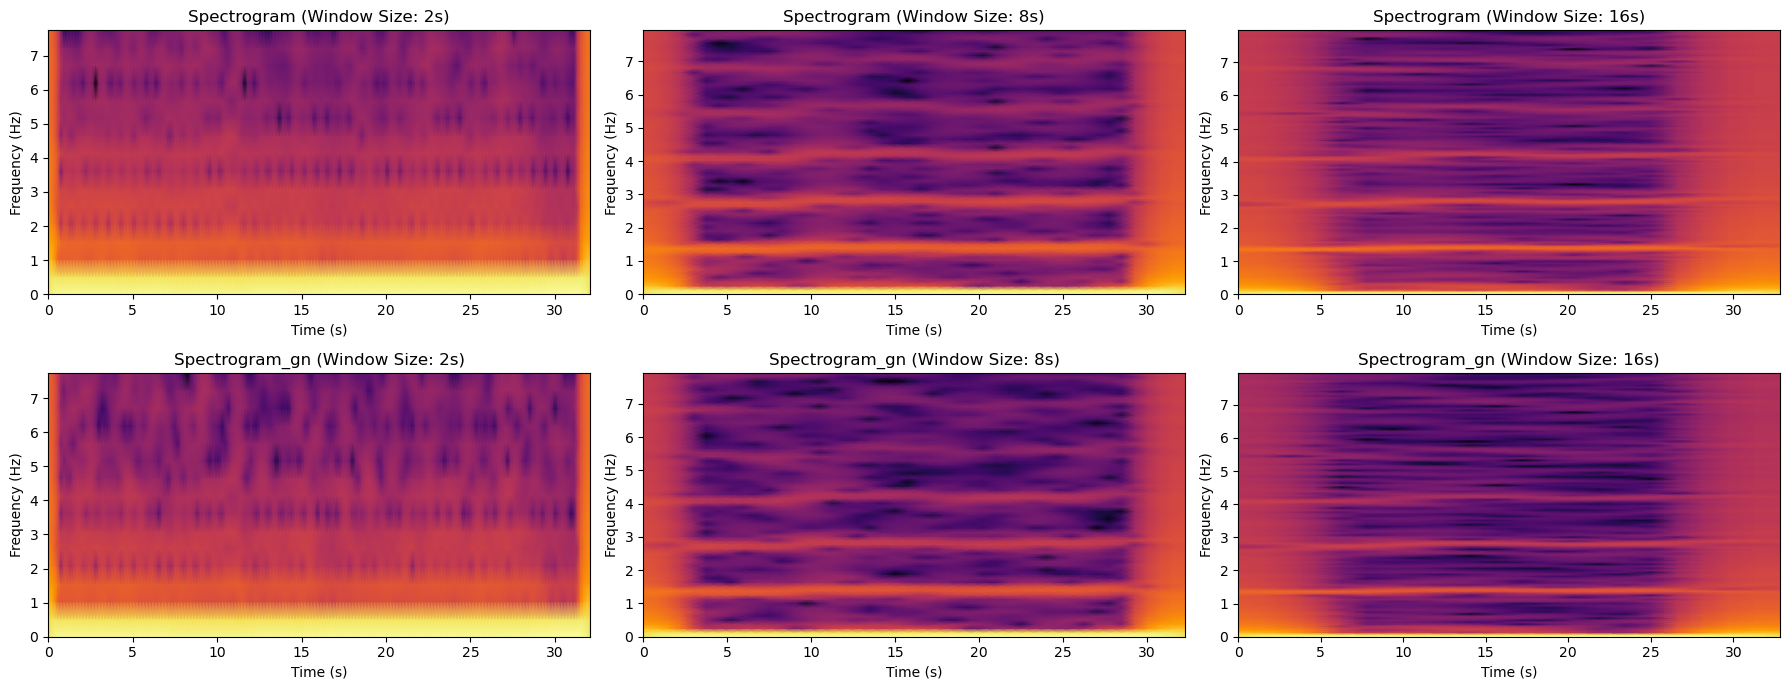

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

duration = 32.14

# Read the dataset into memory
data = pd.read_csv('pulse_oximeter_log.csv', names=['timestamp', 'IR', 'RED'])
N = len(data)
t = np.arange(N) * (duration / N)

# Define coiling machine function using DFT
def coiling_machine(x):
    N = len(x)                          # Get the length of the input signal
    n = np.arange(N)                    # Create a range of indices from 0 to N-1
    k = n.reshape((N, 1))               # Reshape the indices to form an Nx1 matrix

    # Create the complex exponential matrix
    e = np.exp(-2j * np.pi * k * n / N) 

    # Compute the dot product of e and x 
    return np.dot(e, x)                 


# Define function to compute spectrogram using STFT
def spectrogram(x, Fs, window_size):
    '''STFT parameters:
       window   ='hann': Use a Hann window function to reduce spectral leakage and improve frequency resolution.
       nperseg  = int(Fs * window_size): Set the length of each segment to window_size seconds, 
                   converted to the corresponding number of samples using the sampling frequency Fs.
       noverlap = int(Fs * window_size * 0.9): Set the overlap between adjacent segments to 90% 
                    of the segment length, to achieve good temporal resolution while avoiding redundancy.'''
    f, t, Zxx = stft(x, fs=Fs, window='hann', nperseg=int(Fs * window_size), noverlap=int(Fs * window_size * 0.9))
    
    Zxx = np.abs(Zxx)
    Zxx = 20 * np.log10(Zxx)
    
    '''The function returns three arrays:
    f: An array of frequency values for the spectrogram.
    t: An array of time values for the spectrogram.
    Zxx: An array of spectrogram values, computed as the magnitude of the STFT coefficients and converted to decibels.'''
    return f, t, Zxx

# Compute spectrogram for different window sizes
window_sizes = [2, 8, 16]
spectrograms = []
spectrograms_gn = []
for window_size in window_sizes:

    # samples without gaussian noise
    sample = data['RED']
    f, t, Zxx = spectrogram(sample.values, Fs=len(data['RED']) / duration, window_size=window_size)
    spectrograms.append((f, t, Zxx))
    
    # samples with gaussian noise
    sample_gn = data['RED'] + np.random.normal(200, 50, size=len(data['RED'])) # Add gaussian noise
    f_gn, t_gn, Zxx_gn = spectrogram(sample_gn.values, Fs=len(data['RED']) / duration, window_size=window_size)
    spectrograms_gn.append((f_gn, t_gn, Zxx_gn))

# Plot the spectrograms for each window size
fig, axs = plt.subplots(2, 3, figsize=(18, 7))

for i, window_size in enumerate(window_sizes):
    axs[0,i].pcolormesh(spectrograms[i][1], spectrograms[i][0], spectrograms[i][2], cmap='inferno', shading='gouraud')
    axs[0,i].set_title(f'Spectrogram (Window Size: {window_size}s)')
    axs[0,i].set_xlabel('Time (s)')
    axs[0,i].set_ylabel('Frequency (Hz)')
    
    # Plot with Gaussian Noise
    axs[1,i].pcolormesh(spectrograms_gn[i][1], spectrograms_gn[i][0], spectrograms_gn[i][2], cmap='inferno', shading='gouraud')
    axs[1,i].set_title(f'Spectrogram_gn (Window Size: {window_size}s)')
    axs[1,i].set_xlabel('Time (s)')
    axs[1,i].set_ylabel('Frequency (Hz)')
    
plt.tight_layout()
plt.show()


#### Observations Task 4

Edit this section to put your observations.

Regarding the observations brought in by the 16 second window over the 2 or 8 second ones, a longer window size generally results in a better frequency resolution . In this case, using a 16 second window size would allow to observe lower frequency components more clearly, which might be important depending on the application. 

so for window size of 2sec:
    It is more of a smeared kind of frequency plot
    but as we increase the window size we are getting high resolution, strong frequency components. 
    
    So more the number of samples we taking in on go (i.e., large window size). we are getting better resolution. and that leads to better detection.
    
    But by increasing the window size we are getting things at higher SNR, but the tradeoff is we can detect the higher noise spike

### Task 5: Quantization of sensor data [5 + 15 + 8 = 28 points] <a id='task5'></a>
Assume that a 16-bit ADC was used in the sensor that maps the range 0 to 5 volts.
1. How many bits would have sufficed at the minimum without losing the accuracy of the signal?
2. Now start lowering the number of bits (of course virtually), one at a time, up to a minimum of 2 bits, and represent the data with the relevant number of bits. Plot detected BPM versus the number of ADC bits. To detect BPM, directly use a 512-bin FFT on all the samples.
3. Does the plot in 5.2 change if we consider the noisy samples as produced in 4.2?

bpm 84.00746733042936
bpm 84.00746733042936
bpm 84.00746733042936
bpm 84.00746733042936
bpm 84.00746733042936
bpm 84.00746733042936
bpm 84.00746733042936
bpm 84.00746733042936
bpm 84.00746733042936
bpm 84.00746733042936
bpm 84.00746733042936
bpm 84.00746733042936
bpm 84.00746733042936
bpm 84.00746733042936
bpm 84.00746733042936


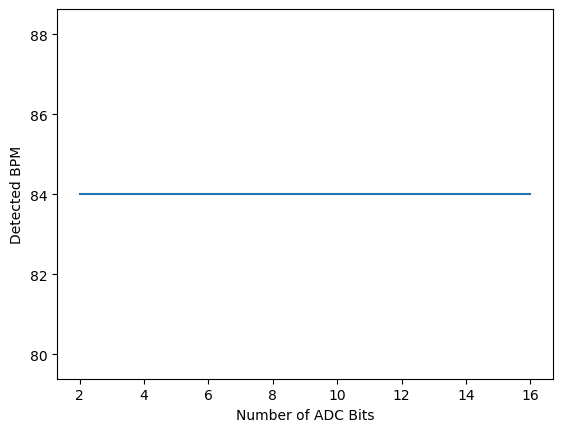

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

duration = 32.14

# Read the dataset into memory
df = pd.read_csv('pulse_oximeter_log.csv', names=['timestamp', 'IR', 'RED'])
N = len(df)
t = np.arange(N) * (duration / N)

# Define coiling machine function using DFT
def coiling_machine(x):
    N = len(x)                          # Get the length of the input signal
    n = np.arange(N)                    # Create a range of indices from 0 to N-1
    k = n.reshape((N, 1))               # Reshape the indices to form an Nx1 matrix

    # Create the complex exponential matrix
    e = np.exp(-2j * np.pi * k * n / N) 

    # Compute the dot product of e and x 
    return np.dot(e, x)                 

# Define function to compute BPM using coiling machine function
def bpm_cm(x, Fs):

    '''e.g., @16 samples per second 320 samples
        by Nyquiest theorem @8 max frequency can be sampled
        i.e., 160 samples '''
    max_freq = Fs / 2
    N = len(x) /2

    '''Getting Peak component always 0, 
    so tried with different slice by changing the value of i = <1 to 5> 
    to get BPM value'''
    i = 2
    
    # Max freq that can be tracked in the provided signals
    resolution = max_freq / N

    if i >= int(N):
       # boundary case, needed to be adjusted
       print("int(N) ", int(N))
       peak_component = int(N)
       peak_freq = peak_component * resolution
       BPM = peak_freq * 60
       return BPM

    idx = np.argmax(np.abs(x[i:int(N)]))
    peak_component = idx + i

    peak_freq = peak_component * resolution
    BPM = peak_freq * 60

    return BPM


# Define function to convert data to specified number of bits
def quantize_data(data, num_bits):
    max_val = 2 ** num_bits - 1
    data = (data / 5) * max_val
    data = np.round(data).astype(int)
    data = (data / max_val) * 5
    return data

# Define function to get detected BPM for given number of ADC bits
def get_bpm_for_adc_bits(df, num_bits):
    Fs = N / duration
    x_values = []

    sample = df['RED']

    quantized_data = quantize_data(sample.values, num_bits)
    # Implement a function realizing the coiling machine analogy
    x_values = np.fft.fft(quantized_data)

    #print("quantized_data", quantized_data)
    
    BPM = bpm_cm(x_values, Fs)
    return BPM

# Compute detected BPM for each number of ADC bits
num_bits_list = [16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2]
bpm_list = []
for num_bits in num_bits_list:
    bpm = get_bpm_for_adc_bits(df, num_bits)
    bpm_list.append(bpm)
    print("bpm", bpm)

# Plot detected BPM versus the number of ADC bits
plt.plot(num_bits_list, bpm_list)
plt.xlabel('Number of ADC Bits')
plt.ylabel('Detected BPM')
plt.show()


#### Observations Task 5

Edit this section to put your observations.

1.  As we know, Resolution improves accuracy in measuring the amplitude of Analog signal
    So, Analog Quantization size/ Resolution Q = (Vmax - Vmin) / 2 ^ n
    
    Q = (5 - 0) / (2 ^ 16 - 1) = 0.0000763 = 7.63 uV
    
    16 bits would sufficed at the minimum without losing the accuracy with resolution = 7.63 uV
    
    
2:    The quantize_data function takes an array of floating-point numbers x and quantizes them to a specified number of bits num_bits. 
   e.g., we have a signal with a voltage range of 0 to 5 volts and we want to represent this signal using only 3 bits.
   
    num_bits = 3
    max_val = 2 ^ num_bits - 1  = 2 ^ 3 - 1 = 7
    data = 3.2 / 5 * 7
    
    This gives us max_val = 7, which is the largest number we can represent using 3 bits. 
    Assume our signal has a value of 3.2 volts. We first normalize this value to a range of 0 to max_val
    
    data = (3.2 / 5) * 7 =  4.48 , on rounding off = 4
    data = data / max_val * 5 = (4 / 7) * 5 = 2.857
    
    This gives us data = 2.857, which is the quantized value that represents the original signal value of 3.2 volt using 3 bits.
    
    Repeat the process for all signals to get quantized data.
    